# Prosper Loan data exploration phase
## by Islam Bakry Mohyee

## Investigation Overview

The goal of this presentation is to visualize the patterns and relations in the Prosper Loan dataset.

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from pandas.api.types import CategoricalDtype

%matplotlib inline

In [2]:
data_file = './data/prosperLoanData.csv'
def_file = './data/Prosper Loan Data - Variable Definitions.xlsx'
df = pd.read_csv(data_file)
def_df = pd.read_excel(def_file)

In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.describe().loc[['mean','min','max']])

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.4211,22.934345,22.271949,0.613629,0.04854,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.02346,16.550751,80.475228
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.00000,0.000000,1.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000,880.000000,899.000000,59.000000,54.000000,136.000000,51.00000,14985.000000,105.000000,379.000000,83.000000,463881.000000,99.000000,38.000000,20.000000,1.435667e+06,5.950000,646285.000000,126.000000,1.000000,20.000000,10.010000,1.750003e+06,8.0000,141.000000,141.000000,42.000000,21.00000,72499.000000,23450.950000,286.000000,2704.000000,44.000000,100.000000,136486.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.00000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 81 features. With features describing the borrower, others that describe the loan itself and some other ids. <br>

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in the dataset is the loan status that represents the current state of the loan whether:  
<li>Performing.
<li>In default ['Chargedoff', 'Defaulted', 'Past Due','Past Due (91-120 days)', 'Past Due (>120 days)']
<li>Days Past Due [DPD<=90]

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
As a risk analyst, I am interested in factors that can help predict the default status of loans:
    These factors are mainly: Score/Rating given by prosper (represented by multiple columns), income(stated income and income range), residential status, employment (status and duration), borrower rate.  
  
In this presentation we will focus on our main feature of interest (LoanStatus) along with Other two features, the Credit Score Range and the Borrower annual rate.

**Create a copy of the dataset with only the variables of interest for the analysis**

In [8]:
df_clean = df.copy()

In [9]:
keep_columns = def_df.query('used == "imp"').index
df_clean = df_clean.iloc[:,keep_columns]
df_clean.columns

Index(['CreditGrade', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio',
       'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanOriginalAmount'],
      dtype='object')

## Univariate Exploration


In this section we inspect the distribution of our variables

**Define the main variable of interest (Performing/ Days Past Due/ Non-performing)**

In [10]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
#Drop Cancelled
cancelled = df_clean.query('LoanStatus == "Cancelled"').index
df_clean = df_clean.drop(index=cancelled)

In [12]:
df_clean.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [13]:
#NPL -> 'Chargedoff', 'Defaulted','Past Due (91-120 days)', 'Past Due (>120 days)'
#Performing -> 'Current', 'Completed', 'FinalPaymenInProgress'
#DaysPastDue(DPD) -> 'Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)'

NPL = ['Chargedoff', 'Defaulted','Past Due (91-120 days)', 'Past Due (>120 days)']
DPD = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)']

In [14]:
def npl(x):
    if x in NPL:
        x = 'NPL'
    elif x in DPD:
        x = 'DPD'
    else:
        x = 'PL'
    return x

In [15]:
npl_type = CategoricalDtype(categories=['PL','NPL','DPD'], ordered=True)
df_clean['NPL'] = df_clean.LoanStatus.apply(npl).astype(npl_type)

In [16]:
df_clean[['NPL']].value_counts()

NPL
PL     94855
NPL    17330
DPD     1747
dtype: int64

**Check the distribution of NPL**

In [17]:
#got this code from this stack exchange: https://stackoverflow.com/questions/18380168/center-output-plots-in-the-notebook
#the code sets all charts to the center
from IPython.core.display import HTML as ALIGN

ALIGN(""" <style>
img {
    margin-left: auto;
    margin-right: auto;
    vertical-align: top;
    justify-content: center;
    display: flex;
}
</style> """)

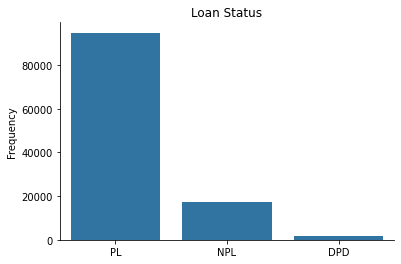

In [18]:
#check the distribution of our main variable of interest
color_blue = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'NPL', color = color_blue)
plt.title('Loan Status')
plt.xlabel(None),plt.ylabel('Frequency')
sb.despine();

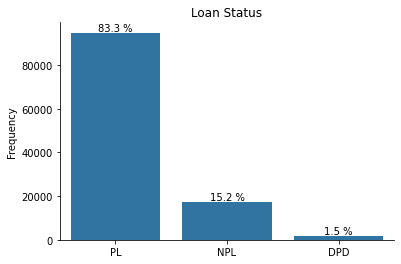

In [19]:
#check the distribution of our main variable of interest and plot percentages on bars
#plt.figure(figsize=[10,5])
sb.countplot(data = df_clean, x = 'NPL', color = color_blue)
plt.title('Loan Status')
plt.xlabel(None),plt.ylabel('Frequency')
sb.despine()
types = df_clean.NPL.value_counts()
for i in range (types.shape[0]):
    type_count = types[i]
    pct = 100*type_count/df_clean.NPL.count()
    pct_string = f'{pct:0.1f} %'
    plt.text(i, type_count+4500, pct_string, ha='center', va='top')

**LoanStatus**  
First we made a transformation on the LoanStatus variable to focus only on the categories of interest from a risk prespective.  
<li>all statuses that indicate a non performing loan was grouped under the category NPL (including the ones with DPD of 90+)
<li>statuses that indicate performing loans were grouped under the category PL
<li>the ones with DPD (from 1 day up to 90 days) are in the DPD group

We can see that most prosper's customers are performing, but about 15% are nonperforming which is high as a credit risk standard. 

During further analysis we will drop the DPD category as it's not needed in our scope

In [20]:
#create dataframe for analysis after variable transformations
df_analysis = pd.DataFrame()

In [21]:
#we will drop the DPD category as it's not needed in the scope of our analysis and add the variable to new df
npl_type = CategoricalDtype(categories=['PL','NPL'], ordered=True)
df_analysis['NPL'] = df_clean.query('NPL != "DPD"')['NPL'].astype(npl_type)

<H3>**Investigate other variables**

In [22]:
df_clean.columns

Index(['CreditGrade', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio',
       'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanOriginalAmount', 'NPL'],
      dtype='object')

**Borrower APR**

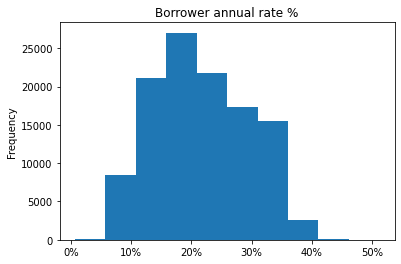

In [23]:
df_clean.BorrowerAPR.plot.hist()
ticks = plt.xticks()[0][1:-1]
plt.xticks(ticks,labels=[f'{x*100:.0f}%' for x in ticks])
plt.title('Borrower annual rate %');

From the get go we get a well defined distribution with a peak at about 20% and a slight skew to the right.

In [24]:
df_analysis = df_analysis.join(df['BorrowerAPR'],how='inner')

**CreditGrade**  
which represents credit rating for loans rated before 2009

In [25]:
#Define a categorical dtype for credit grade variable
#0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA
grade_type = CategoricalDtype(categories=['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

In [26]:
credit_grade = df_clean.CreditGrade.astype(grade_type).dropna().cat
median = credit_grade.codes.median()
credit_grade.categories[int(median)]

'C'

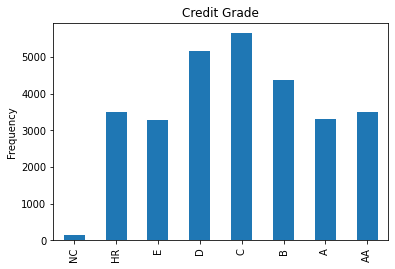

In [27]:
df_clean.CreditGrade.astype(grade_type).value_counts().sort_index().plot.bar()
plt.title('Credit Grade'),plt.ylabel('Frequency');

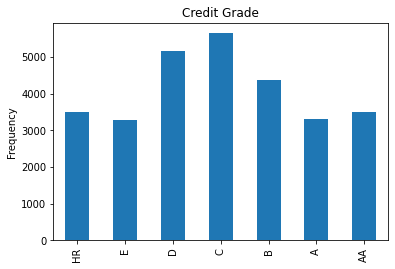

In [28]:
df_clean.CreditGrade.astype(grade_type).value_counts().drop('NC').sort_index().plot.bar()
plt.title('Credit Grade'),plt.ylabel('Frequency');

In [29]:
df_analysis['CreditGrade'] = df_clean.CreditGrade.astype(grade_type)

**'ProsperRating (numeric)','ProsperRating (Alpha)', 'ProsperScore'**  
These are all related to the credit rating for loans after 2009  
<li>The first two are categorical variables one with codes and the other is names of ratings.  
<li>The third one is a score that is used to assign the rating. <br>
We'll see which one is more useful in the analysis. The first would be useful in the representation and the last would be more meaningful in the case of estimation.

1- **'ProsperRating (numeric)', 'ProsperRating (Alpha)'**

In [30]:
df_clean[['ProsperRating (numeric)','ProsperRating (Alpha)']].value_counts().sort_index(level=0)

ProsperRating (numeric)  ProsperRating (Alpha)
1.0                      HR                        6935
2.0                      E                         9795
3.0                      D                        14274
4.0                      C                        18345
5.0                      B                        15581
6.0                      A                        14551
7.0                      AA                        5372
dtype: int64

The first two are obviously the same and can be replaced by a categorical variable that shows the categories and stores the codes too

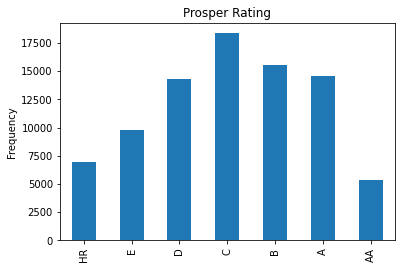

In [31]:
df_clean['ProsperRating (Alpha)'].astype(grade_type).value_counts().drop('NC').sort_index().plot.bar()
plt.title('Prosper Rating'),plt.ylabel('Frequency');

In [32]:
#we drop na when calculating the median because these loans aren't rated by the prosper system after 2009
credit_rating = df_clean['ProsperRating (Alpha)'].astype(grade_type).dropna().cat
median = credit_rating.codes.median()
credit_rating.categories[int(median)]

'C'

In [33]:
df_clean[['ProsperRating (numeric)','ProsperRating (Alpha)']].value_counts().sort_index(level=0)

ProsperRating (numeric)  ProsperRating (Alpha)
1.0                      HR                        6935
2.0                      E                         9795
3.0                      D                        14274
4.0                      C                        18345
5.0                      B                        15581
6.0                      A                        14551
7.0                      AA                        5372
dtype: int64

In [34]:
#Notice the -1 is for the NA
df_clean['ProsperRating (Alpha)'].astype(grade_type).cat.codes.value_counts().sort_index()

-1    29079
 1     6935
 2     9795
 3    14274
 4    18345
 5    15581
 6    14551
 7     5372
dtype: int64

We see that after conversion the variable gives the same names as shown in the chart and still preserves the codes as shown above

In [35]:
df_analysis['ProsperRating'] = df_clean['ProsperRating (Alpha)'].astype(grade_type)

2- **'ProsperScore'**  

In [36]:
df_clean.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

The scores of 11 are abnormal because the score only goes up to 10 so these may be wrong data so we drop them

In [37]:
idx = pd.IndexSlice
df_clean[['ProsperRating (Alpha)','ProsperScore']].value_counts().sort_index(level=0).loc[idx[:,[11.0]]]

ProsperRating (Alpha)  ProsperScore
A                      11.0            521
AA                     11.0            739
B                      11.0            171
C                      11.0             25
dtype: int64

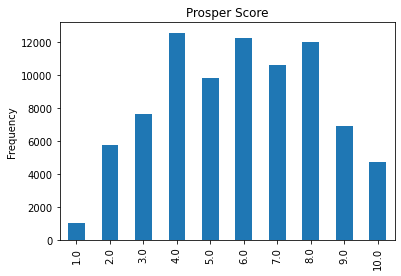

In [38]:
temp = df_clean.drop(df_clean.query('ProsperScore == 11.0').index)
temp.ProsperScore.value_counts().sort_index().plot.bar()
plt.title('Prosper Score'),plt.ylabel('Frequency');

In [39]:
temp.ProsperScore.median()

6.0

The distribution of Prosper score is concentrated around the center categories and has a median of 6 but having no definite peak and a multiple modes. 

which may lead to a bad relation with the variable of interest and needs further investigation on which one we chose from these three 

In [40]:
df_clean[df_clean['ProsperRating (Alpha)'].notna()].CreditGrade.isna().all()

True

In [41]:
df_clean[df_clean['CreditGrade'].notna()]['ProsperRating (Alpha)'].isna().all()

True

Maybe we can merge the creditGrade and ProsperRating in further investigation but we need further info if we can really mix and match those two ratings columns

In [42]:
#add the ProsperScore column to the analysis dataframe and drop the rows with Score = 11
df_analysis = df_analysis.join(temp.ProsperScore, how='inner')

**'Occupation',  'EmploymentStatus',  'EmploymentStatusDuration',**  
These are all related to the employment of the borrower  
  
We'll see which one is more useful in the analysis.

1- **'Occupation'**  

In [43]:
df_clean.Occupation.value_counts()

Other                          28616
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64

In [44]:
#check the distribution of our main variable of interest and plot percentages on bars
#plt.figure(figsize = [6, 6]) 
#sb.countplot(data = df_clean, y = 'Occupation', color = color_blue)
#plt.title('Loan Status')
#plt.xlabel(None)
#plt.show()

Occupation has too many categories to be useful for visual analysis.

2- **'EmploymentStatus'**  

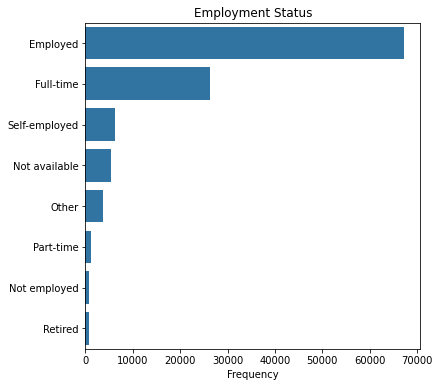

In [45]:
#check the distribution of our main variable of interest and plot percentages on bars
work_order=df_clean.EmploymentStatus.value_counts().index
plt.figure(figsize = [6, 6]) 
sb.countplot(data = df_clean, y = 'EmploymentStatus', color = color_blue, order=work_order)
plt.title('Employment Status')
plt.ylabel(None),plt.xlabel('Frequency')
plt.show()

Employment Status would be enough for the scope of visual analysis
Since employment status is not ordered we just have to look at the frequencies of categories.
The highest frequency are employed and full-time employed borrowers

3- **'EmploymentStatusDuration'**  

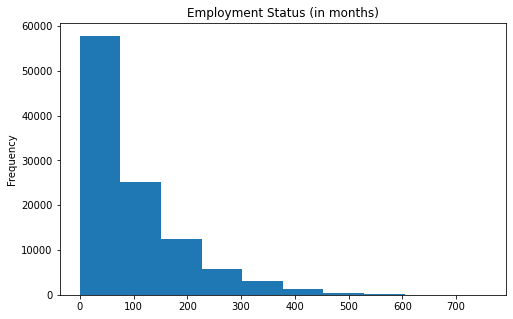

In [46]:
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'EmploymentStatusDuration')
plt.title('Employment Status (in months)')
plt.ylabel('Frequency')
plt.show()

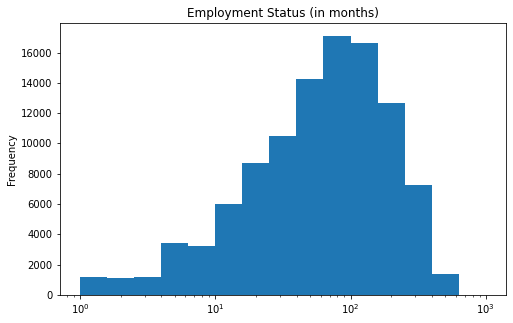

In [47]:
# since the plotis highly skewed to the right we are going to use a log-scale and transformation
log_binsize = 0.2
np.log10(df_clean['EmploymentStatusDuration'].max())+log_binsize
bins = 10 ** np.arange(0, np.log10(df_clean['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'EmploymentStatusDuration', bins=bins)
plt.xscale('log')
plt.ylabel('Frequency')
plt.title('Employment Status (in months)')
plt.show()

In [48]:
df_clean['EmploymentStatusDuration'].mean()

96.0722032527208

After the log transformation, the distribution of EmploymentStatusDuration appears to be distributed around a mean of 100 months but it's a little skewed to the left still.

In [49]:
df_analysis = df_analysis.join(df_clean['EmploymentStatus'], how='inner')
df_analysis = df_analysis.join(np.log10(df_clean.query('EmploymentStatusDuration != 0')['EmploymentStatusDuration']).rename('log_EmploymentStatusDuration'), how='inner')

In [50]:
df_analysis.EmploymentStatus = df_analysis.EmploymentStatus.astype('category')

**'IsBorrowerHomeowner'**  

In [51]:
df_clean.IsBorrowerHomeowner.describe()

count     113932
unique         2
top         True
freq       57476
Name: IsBorrowerHomeowner, dtype: object

In [52]:
df_clean.IsBorrowerHomeowner.value_counts()

True     57476
False    56456
Name: IsBorrowerHomeowner, dtype: int64

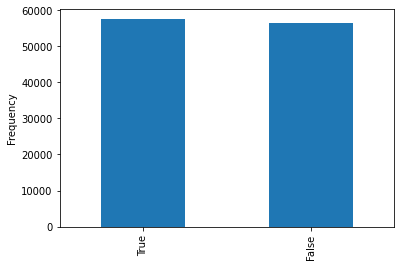

In [53]:
df_clean.IsBorrowerHomeowner.value_counts().plot.bar()
plt.ylabel('Frequency');

The variable appears to have no real distribution and may prove useless with further investigation.

In [54]:
df_analysis = df_analysis.join(df_clean.IsBorrowerHomeowner, how='inner')

**'CreditScoreRangeLower', 'CreditScoreRangeUpper'**  
These variables describe the upper and lower bound of Credit Score range assigned by external rating agency.

In [55]:
df_clean[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].value_counts().sort_index(level=1)

CreditScoreRangeLower  CreditScoreRangeUpper
0.0                    19.0                       133
360.0                  379.0                        1
420.0                  439.0                        5
440.0                  459.0                       36
460.0                  479.0                      141
480.0                  499.0                      346
500.0                  519.0                      553
520.0                  539.0                     1592
540.0                  559.0                     1474
560.0                  579.0                     1357
580.0                  599.0                     1125
600.0                  619.0                     3602
620.0                  639.0                     4172
640.0                  659.0                    12198
660.0                  679.0                    16366
680.0                  699.0                    16492
700.0                  719.0                    15471
720.0                  739.0         

The variables form a range and together represent a categorical variable.
We will merge them together

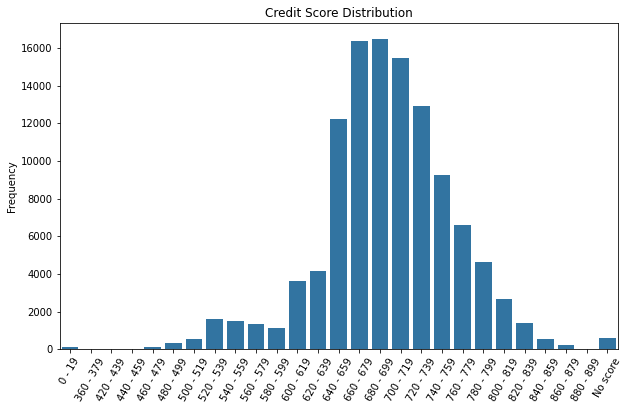

In [56]:
x = df_clean.CreditScoreRangeLower.apply(lambda x: str(x).split('.')[0])
y = df_clean.CreditScoreRangeUpper.apply(lambda x: str(x).split('.')[0])
z = x + ' - ' + y
z.loc[(z == 'nan - nan')] = 'No score'
z_order = z.value_counts().sort_index().index
plt.figure(figsize=[10,6])
sb.countplot(x=z, order=z_order,color=color_blue)
plt.xticks(rotation=60)
plt.ylabel('Frequency')
plt.title('Credit Score Distribution');

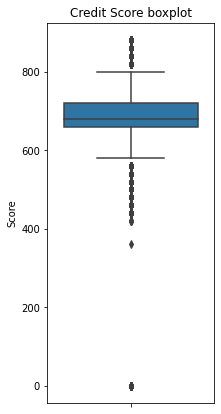

In [57]:
plt.figure(figsize=[3,7])
sb.boxplot(data=df_clean, y='CreditScoreRangeLower')
plt.ylabel('Score')
plt.title('Credit Score boxplot');

the histogram shows a nice distribution chart but appears to have tails to the right and left,  
we use a boxplot to check for outliers visually, the points outside the whiskers can be considered outliers  
we will drop them and create both charts again

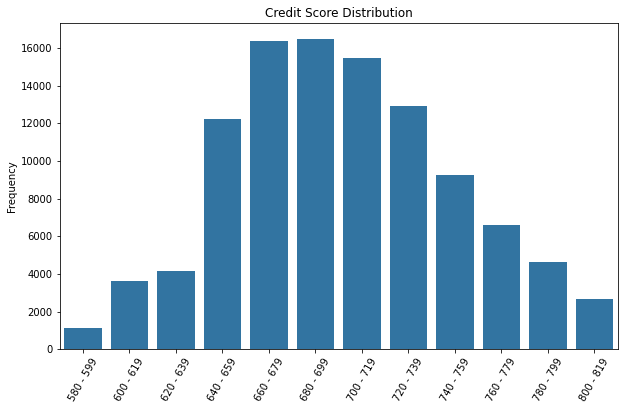

In [58]:
temp = df_clean.query('CreditScoreRangeLower > 560 and CreditScoreRangeLower < 820 ')
x = temp.CreditScoreRangeLower.apply(lambda x: str(x).split('.')[0])
y = temp.CreditScoreRangeUpper.apply(lambda x: str(x).split('.')[0])
z = x + ' - ' + y
z.loc[(z == 'nan - nan')] = 'No score'
z_order = z.value_counts().sort_index().index
plt.figure(figsize=[10,6])
sb.countplot(x=z, order=z_order,color=color_blue)
plt.xticks(rotation=60)
plt.ylabel('Frequency')
plt.title('Credit Score Distribution');

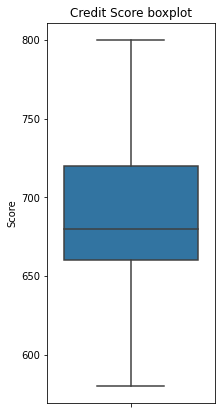

In [59]:
plt.figure(figsize=[3,7])
sb.boxplot(data=temp, y='CreditScoreRangeLower')
plt.ylabel('Score')
plt.title('Credit Score boxplot');

The variable indicates the credit score by a consumer rating agency, the upper and lower columns were merged to form a categorical range variable.  
the points with no rating were dropped and by examining the box plot we also dropped the outlier values.  
The remaining points had a fairly normal distribution with the center around the 700 score.

In [60]:
score_type = CategoricalDtype(categories=z_order , ordered=True)

In [61]:
z.rename('CreditScoreRange', inplace=True)
df_analysis = df_analysis.join(z.astype(score_type), how='inner')

**'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome'**  
These variables are all related to income will check which of them is more useful for income data.

1- **'DebtToIncomeRatio'**

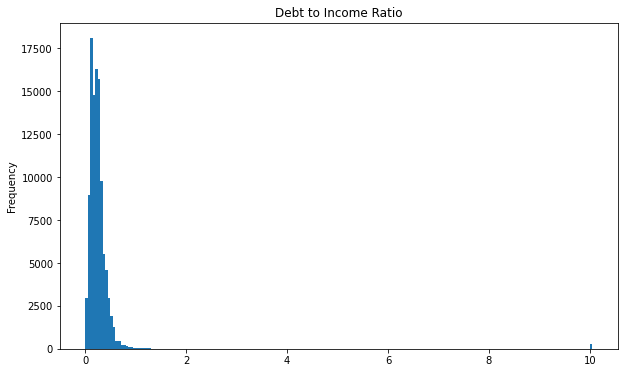

In [62]:
plt.figure(figsize=[10,6])
bins = np.arange(0, df_clean['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data = df_clean, x='DebtToIncomeRatio', bins=bins)
plt.ylabel('Frequency')
plt.title('Debt to Income Ratio');

By inspecting the basic histogram, it appears that there are very extreme outliers that need to be eliminated,  
we can check those using a boxplot.

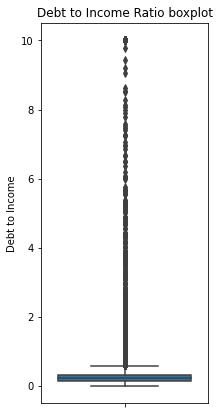

In [63]:
plt.figure(figsize=[3,7])
sb.boxplot(data=df_clean, y='DebtToIncomeRatio')
plt.ylabel('Debt to Income')
plt.title('Debt to Income Ratio boxplot');

also the boxplot gives the same conclusion, we will drop the outliers and recheck the charts.  
Logically, the debt to income shouldn't exceed 1, and from a risk perspective it's already bad to go beyond 50%

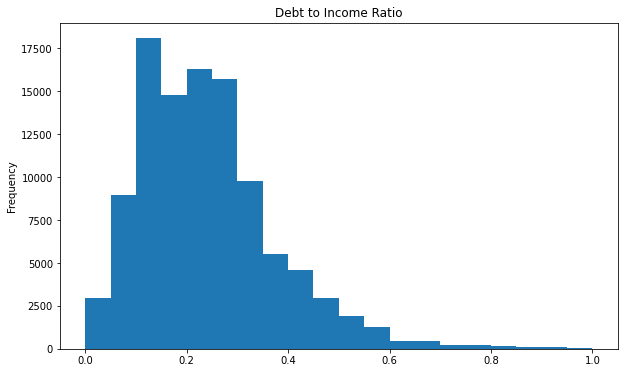

In [64]:
temp = df_clean.query('DebtToIncomeRatio <1')

plt.figure(figsize=[10,6])
bins = np.arange(0, temp['DebtToIncomeRatio'].max()+0.05, 0.05)
plt.hist(data = temp, x='DebtToIncomeRatio', bins=bins)
plt.ylabel('Frequency')
plt.title('Debt to Income Ratio');

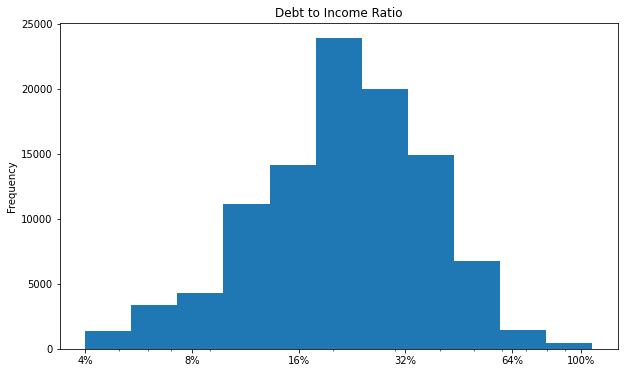

In [65]:
temp = df_clean.query('DebtToIncomeRatio >= 0.04 and DebtToIncomeRatio <=1')
plt.figure(figsize=[10,6])
bins = 10**np.arange(np.log10(temp['DebtToIncomeRatio'].min()), np.log10(temp['DebtToIncomeRatio'].max())+0.1, 0.13)
plt.hist(x=temp['DebtToIncomeRatio'], bins=bins)
plt.xscale('log')
plt.ylabel('Frequency')
plt.xticks([0.04,0.08,0.16,0.32,0.64,1],['4%','8%','16%','32%','64%','100%'])
plt.title('Debt to Income Ratio');

After visual inspection of the DebtToIncomeRatio using multiple plots we found irregularities in the data.  
so we plotted the histogram on a log-scale and got rid of the outliers greater than 100%, and less than 4%.  
After these modifications we got a nice distribution for the values of DebtToIncomeRatio.

In [66]:
df_analysis = df_analysis.join(np.log10(temp['DebtToIncomeRatio']).rename('log_DIR'), how='inner')

2- **'IncomeRange', 'StatedMonthlyIncome'**

These two variables represent the same feautre which is income.  
We'll choose one to include in the analysis based on the visual analysis of charts

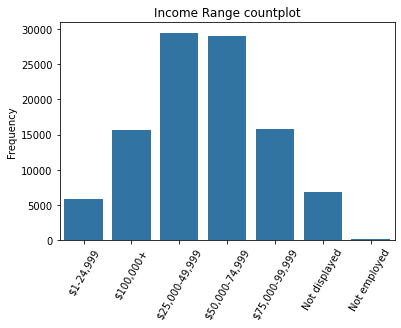

In [67]:
sb.countplot(data=temp.sort_values(by='IncomeRange'), x='IncomeRange',color=color_blue)
plt.ylabel('Frequency')
plt.xlabel(None)
plt.title('Income Range countplot')
plt.xticks(rotation=60);

Since the categorical variable income range has a distribution that is not well sorted (100K+ category doesn't follow the distribution),  
we will use the numerical variable 'StatedMonthlyIncome' for better granularity converted to annual income.

In [68]:
temp = df_clean[['IncomeRange']].join((df_clean.StatedMonthlyIncome*12).rename('AnnualIncome'), how='inner')

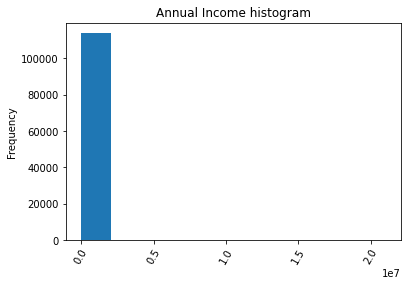

In [69]:
plt.hist(data=temp, x='AnnualIncome')
plt.ylabel('Frequency')
plt.xlabel(None)
plt.title('Annual Income histogram')
plt.xticks(rotation=60);

using the defualt bins the data doesn't show in the histogram, we will try defining better bins.

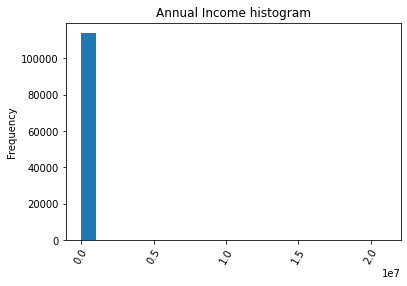

In [70]:
bins = np.arange(0,temp.AnnualIncome.max()+1e3,1e6)
plt.hist(data=temp, x='AnnualIncome',bins=bins)
plt.ylabel('Frequency')
plt.xlabel(None)
plt.title('Annual Income histogram')
plt.xticks(rotation=60);

looks like the values are all lumped up in the first bar of 1Million, we will try limiting the x-axis to have a better look.

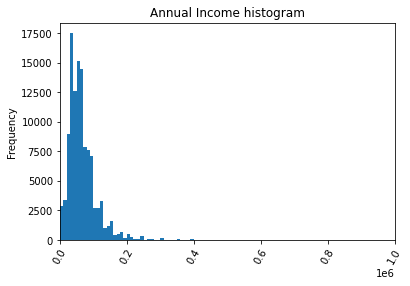

In [71]:
bins = np.arange(0,temp.AnnualIncome.max()+1e3,1e4)
plt.hist(data=temp, x='AnnualIncome',bins=bins)
plt.xlim([0,1e6])
plt.ylabel('Frequency')
plt.xlabel(None)
plt.title('Annual Income histogram')
plt.xticks(rotation=60);

Still after having a closer look, the data is highly skewed to the right.  
This needs using a log-scale and manipulating the limits even more.

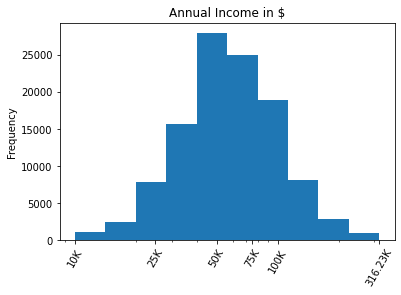

In [72]:
temp2 = temp.query('AnnualIncome >= 1e4 and AnnualIncome <=10**5.5')
bins = 10**np.arange(np.log10(temp2.AnnualIncome.min()), np.log10(temp2.AnnualIncome.max())+0.01, 0.15)
plt.hist(data=temp2, x='AnnualIncome', bins=bins)
plt.xscale('log')
plt.xticks([1e4,2.5e4,5e4,7.5e4,1e5,10**5.5],['10K','25K','50K','75K','100K',f'{10**5.5/1000:.2f}K'])
plt.xticks(rotation=60)
plt.ylabel('Frequency')
plt.title('Annual Income in $');

The chart now appears to show a normal distribution for the Income variable on a log-scale after dropping values outside of the range [10K, 316.23K]

In [73]:
df_analysis = df_analysis.join(np.log10(temp2.AnnualIncome).rename('log_AnnualIncome'), how='inner')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


### Summary

**LoanStatus**  
First we made a transformation on the LoanStatus variable to focus only on the categories of interest from a risk prespective.  
<li>all statuses that indicate a non performing loan was grouped under the category NPL (including the ones with DPD of 90+)
<li>statuses that indicate performing loans were grouped under the category PL
<li>the ones with DPD (from 1 day up to 90 days) are in the DPD group

We can see that most prosper's customers are performing, but about 15% are nonperforming which is high as a credit risk standard. 

During further analysis we will drop the DPD category as it's not needed in our scope

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**BorrowerAPR**  
From the get go we get a well defined distribution with a peak at about 20% and a slight skew to the right.

**CreditGrade**  
by checking the credit grade variable and transforming it into ordered categorical variable we drop the na values (because this variable includes credit rating before 2009) and by inspecting its barchart we notice a small number of NC (No credit rating). Other than that the chart appears symetrically distributed with 'C' being the median grade of the distribution.

**ProsperRating (numeric/alpha)**  
by transforming it into ordered categorical variable we drop the na values (because this variable includes credit rating before 2009) and by inspecting its barchart appears symetrically distributed with 'C' being the median grade of the distribution.  
This shows the same properties as CreditGrade but for loans after 2009

**ProsperScore**  
Although the distribution of the prosper score has the same general shape as the ProsperRating but it doesn't have a definite mode or shape which may lead to a bad relation with the variable of interest (LoanStatus).

**Occupation**  
Occupation has too many categories to be useful for visual analysis.

**EmploymentStatus**  
Employment Status would be enough for the scope of visual analysis  
Since employment status is not ordered we just have to look at the frequencies of categories.  
The highest frequency are employed and full-time employed borrowers

**EmploymentStatusDuration**  
Employment Status Duration is the first numerical variable in the analysis.  
The histogram shows that the distribution is highly skewed to the right.  
A log transformation was applied to counter the skewness and the distribution appears to follow a log distribution more being nearly centered around a mean of 100.

**IsBorrowerHomeowner**  
IsBorrowerHomeowner appears to have no real distribution and may prove useless with further investigation.

**CreditScoreRange**  
The variable indicates the credit score by a consumer rating agency, the upper and lower columns were merged to form a categorical range variable.  
the points with no rating were dropped and by examining the box plot we also dropped the outlier values.  
The remaining points had a fairly normal distribution with the center around the 700 score.

**DebtToIncomeRatio**  
After visual inspection of the DebtToIncomeRatio using multiple plots we found irregularities in the data.  
so we plotted the histogram on a log-scale and got rid of the outliers greater than 100%, and less than 4%.  
After these modifications we got a nice distribution for the values of DebtToIncomeRatio.

**DebtToIncomeRatio**  
After visual inspection of the DebtToIncomeRatio using multiple plots we found irregularities in the data.  
so we plotted the histogram on a log-scale and got rid of the outliers greater than 100%, and less than 4%.  
After these modifications we got a nice distribution for the values of DebtToIncomeRatio.

**IncomeRange, StatedMonthlyIncome**

Since the categorical variable income range has a distribution that is not well sorted (100K+ category doesn't follow the distribution),  
we will use the numerical variable 'StatedMonthlyIncome' for better granularity converted to annual income by multiplying by 12.

The AnnualIncome data is highly skewed to the right.  
This needs using a log-scale and manipulating the limits even more.

It now appears to show a normal distribution on a log-scale after dropping values outside of the range [10K, 316.23K]

## Bivariate Exploration

In this section we take a look at the relation between our selected variables and our variable of interest (NPL).

In [74]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90552 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   NPL                           90552 non-null  category
 1   BorrowerAPR                   90552 non-null  float64 
 2   CreditGrade                   19443 non-null  category
 3   ProsperRating                 71004 non-null  category
 4   ProsperScore                  71004 non-null  float64 
 5   EmploymentStatus              89678 non-null  category
 6   log_EmploymentStatusDuration  86804 non-null  float64 
 7   IsBorrowerHomeowner           90552 non-null  bool    
 8   CreditScoreRange              90552 non-null  category
 9   log_DIR                       90552 non-null  float64 
 10  log_AnnualIncome              90552 non-null  float64 
dtypes: bool(1), category(5), float64(5)
memory usage: 4.7 MB


In [75]:
#create code columns for categorical variables to allow for calculating correlation
for var in df_analysis.columns:
    if df_analysis[var].dtype.name == 'category':
        df_analysis[f'{var}_codes'] = df_analysis[var].cat.codes

In [76]:
NPL_corr = df_analysis.corr()['NPL_codes']

In [77]:
NPL_corr

BorrowerAPR                     0.134044
ProsperScore                   -0.048822
log_EmploymentStatusDuration   -0.056058
IsBorrowerHomeowner            -0.003507
log_DIR                         0.026939
log_AnnualIncome               -0.112979
NPL_codes                       1.000000
CreditGrade_codes               0.265955
ProsperRating_codes            -0.328915
EmploymentStatus_codes          0.172397
CreditScoreRange_codes         -0.173297
Name: NPL_codes, dtype: float64

We will focus our analysis on the variables with the correlations higher than ABS(10%)

In [78]:
NPL_corr[(abs(NPL_corr)>0.1) & (abs(NPL_corr)<1)].sort_values()

ProsperRating_codes      -0.328915
CreditScoreRange_codes   -0.173297
log_AnnualIncome         -0.112979
BorrowerAPR               0.134044
EmploymentStatus_codes    0.172397
CreditGrade_codes         0.265955
Name: NPL_codes, dtype: float64

**Borrower APR**

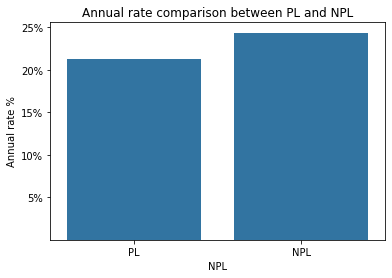

In [79]:
sb.barplot(data=df_analysis, x='NPL', y='BorrowerAPR', ci=None, color=color_blue)
ticks = plt.yticks()[0][1:-1]
plt.yticks(ticks,labels=[f'{x*100:.0f}%' for x in ticks])
plt.ylabel('Annual rate %')
plt.title('Annual rate comparison between PL and NPL')
plt.show()

We can see from the chart that the annuall rate is higher for customers in the NPL group due to them being rated in higher risk which entails higher rates

**CreditScoreRange**

In [80]:
df_analysis.groupby('NPL')['CreditScoreRange_codes'].median()

NPL
PL     6
NPL    4
Name: CreditScoreRange_codes, dtype: int8

In [81]:
PL_median = df_analysis['CreditScoreRange'].cat.categories[6]
NPL_median = df_analysis['CreditScoreRange'].cat.categories[4]
print(f'''PL median ScoreRange is {PL_median}
NPL median ScoreRange is {NPL_median}''')

PL median ScoreRange is 700 - 719
NPL median ScoreRange is 660 - 679


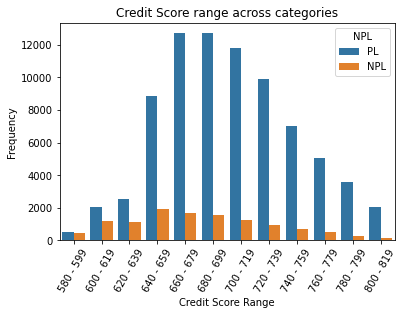

In [82]:
sb.countplot(data = df_analysis, x = 'CreditScoreRange', hue = 'NPL')
plt.xlabel('Credit Score Range')
plt.ylabel('Frequency')
plt.title('Credit Score range across categories')
plt.xticks(rotation=60);

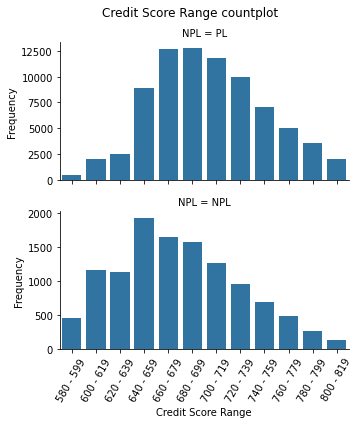

In [83]:
(sb.catplot(data=df_analysis, x='CreditScoreRange', col='NPL', kind='count', col_wrap=1,
           color=color_blue,sharey=False, height=2.5, aspect=2)
 .set_axis_labels('Credit Score Range', 'Frequency'))
plt.suptitle('Credit Score Range countplot', y=1.03)
plt.xticks(rotation=60);

**ProsperRating**

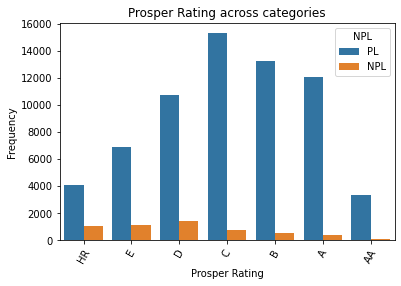

In [84]:
sb.countplot(data = df_analysis, x = 'ProsperRating', hue = 'NPL', order=df_analysis.ProsperRating.cat.categories[1:])
plt.xlabel('Prosper Rating')
plt.ylabel('Frequency')
plt.title('Prosper Rating across categories')
plt.xticks(rotation=60);

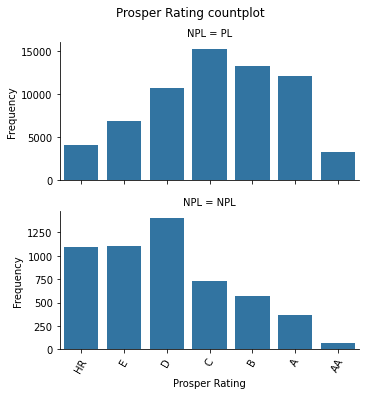

In [85]:
(sb.catplot(data=df_analysis, x='ProsperRating', col='NPL', kind='count', col_wrap=1,
           color=color_blue,sharey=False, height=2.5, aspect=2, order=df_analysis.ProsperRating.cat.categories[1:])
 .set_axis_labels('Prosper Rating', 'Frequency'))
plt.suptitle('Prosper Rating countplot', y=1.03)
plt.xticks(rotation=60);

**CreditGrade**

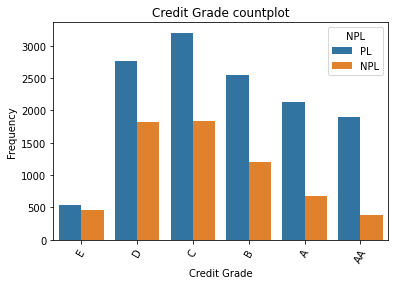

In [86]:
sb.countplot(data = df_analysis, x = 'CreditGrade', hue = 'NPL', order=df_analysis.ProsperRating.cat.categories[2:])
plt.xticks(rotation=60)
plt.xlabel(None)
plt.ylabel(None)
plt.xlabel('Credit Grade')
plt.ylabel('Frequency')
plt.title('Credit Grade countplot');

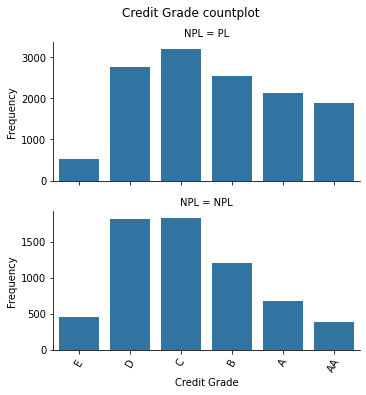

In [87]:
(sb.catplot(data=df_analysis, x='CreditGrade', col='NPL', kind='count', col_wrap=1,
           color=color_blue,sharey=False, height=2.5, aspect=2,
           order=df_analysis.ProsperRating.cat.categories[2:])
 .set_axis_labels('Credit Grade', 'Frequency'))
plt.suptitle('Credit Grade countplot', y=1.03)
plt.xticks(rotation=60);

Since the count of PL is much higher than NPL, visualization using Faceting is better than grouped countplots.

<li>(CreditScoreRange) is obtained from external rating agencies and shows a weak relation with the NPL status of the loan.

<li>The second (ProsperRating) is prosper's own rating of its customers and shows a stronger relation with the NPL status of the loans, where the customers in NPL are concentrated in worse ratings (axis sorted from worst to best) and customers with PL status were generally rated highly at time of origination.  
<li> The third (CreditGrade) is prosper's rating for loans originated before 2009, NPLs were mostly rated C or less, but PLs were given ratings across all categories which indicates a weaker relation.  
    
These points shows that Prosper's own rating model is better than the external one, and they're good at improving there models where the newer one is better.

**AnnualIncome**

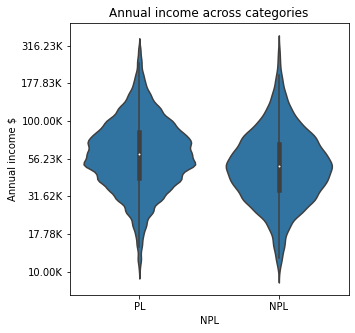

In [88]:
plt.figure(figsize = [5, 5]) 

sb.violinplot(data=df_analysis, x='NPL', y='log_AnnualIncome', color=color_blue)
ticks = plt.yticks()[0][1:-1]
plt.yticks(ticks=ticks, labels=[f'{(10**x)/1000:.2f}K' for x in ticks])
plt.ylabel('Annual income $')
plt.title('Annual income across categories');

The distribution of income is mostly the same across both categories but there's a slight upward shift of income in the PL category which indicates the weak relation that customers with higher income perform better on repayment.  

**Employment Status**

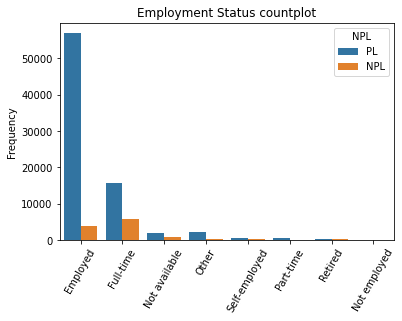

In [89]:
employ_order = df_analysis.EmploymentStatus.value_counts().index

sb.countplot(data = df_analysis, x = 'EmploymentStatus', hue = 'NPL', order=employ_order)
plt.xticks(rotation=60)
plt.xlabel(None)
plt.ylabel('Frequency')
plt.title('Employment Status countplot');

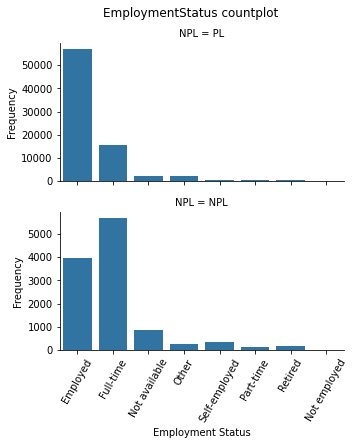

In [90]:
(sb.catplot(data=df_analysis, x='EmploymentStatus', col='NPL', kind='count', col_wrap=1,
           color=color_blue,sharey=False, height=2.5, aspect=2,
           order=employ_order)
 .set_axis_labels('Employment Status', 'Frequency')
)
plt.suptitle('EmploymentStatus countplot', y=1.03)
plt.xticks(rotation=60);

Since the count of PL is much higher than NPL, visualization using Faceting is better than grouped countplots.

Inspecting the factor visually gives no useful insights as the categories are of an unkown order and most customers are in the Employed/Full-Time categories in both groups(PL,NPL)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### Summary

**Borrower APR**

The annual rate is higher for customers in the NPL group due to them being rated in higher risk which entails higher rates

**CreditScoreRange**

<li>(CreditScoreRange) is obtained from external rating agencies and shows a weak relation with the NPL status of the 

**ProsperRating, CreditGrade**

<li>The second (ProsperRating) is prosper's own rating of its customers and shows a stronger relation with the NPL status of the loans, where the customers in NPL are concentrated in worse ratings (axis sorted from worst to best) and customers with PL status were generally rated highly at time of origination.  
<li> The third (CreditGrade) is prosper's rating for loans originated before 2009, NPLs were mostly rated C or less, but PLs were given ratings across all categories which indicates a weaker relation.  
    
These points shows that Prosper's own rating model is better than the external one, and they're good at improving there models where the newer one is better.

**Annual Income**

The distribution of income is mostly the same across both categories but there's a slight upward shift of income in the PL category which indicates the weak relation that customers with higher income perform better on repayment.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In [91]:
temp = df_analysis.corr()

In [92]:
temp_sorted = ['NPL_codes','ProsperScore',
               'CreditGrade_codes','ProsperRating_codes','CreditScoreRange_codes',
               'BorrowerAPR','log_AnnualIncome','log_DIR','IsBorrowerHomeowner',
               'EmploymentStatus_codes','log_EmploymentStatusDuration']

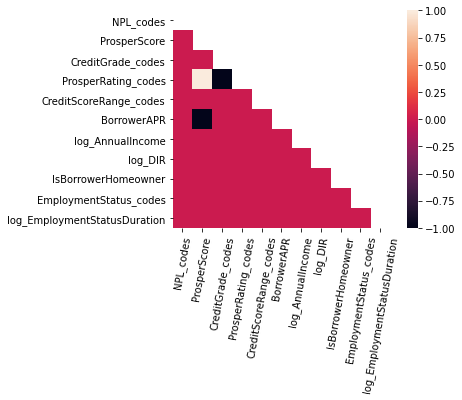

In [93]:
temp = df_analysis.corr()
temp = temp.reindex(temp_sorted)[temp_sorted]

#mask for hiding the upper triangle of the heatmap
matrix=np.triu(temp)

temp = temp.applymap(lambda x: np.sign(x)*1 if abs(x)>0.5 else 0)

#plt.figure(figsize=[9,8])
sb.heatmap(temp, square=True,
           mask=matrix
          )
plt.xticks(rotation=80)
plt.show()

Taking a shortcut here, we use a correlation matrix to identify the relation between the other features.  
We take a significantly higher correlation threshold of ABS(0.5).  
**We use a heatmap to have a better faster look at the variables with strong correlations:**
<li>A relation between Prosper rating with Prosper score and Credit grade, these are obviously related as they both describe the same feature.
<li>A relation between Prosper score and Borrower APR, this shows that customers who get higher scores are generally charged a lower rate. 

We will now look at the relation between Prosper score and Borrower APR as it's more interesting

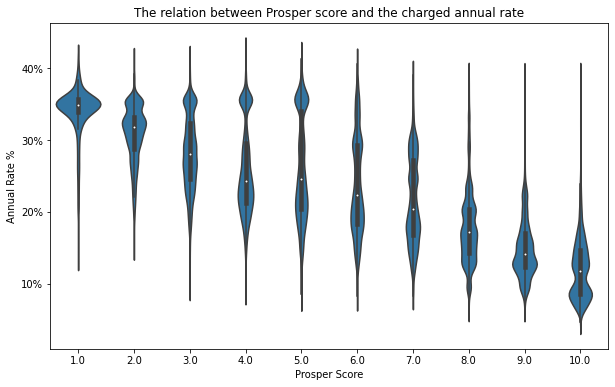

In [94]:
plt.figure(figsize = [10, 6]) 

sb.violinplot(data=df_analysis, x='ProsperScore', y='BorrowerAPR', color=color_blue)

ticks = plt.yticks()[0][1:-1]
plt.yticks(ticks,labels=[f'{x*100:.0f}%' for x in ticks])
plt.xlabel('Prosper Score'),plt.ylabel('Annual Rate %')
plt.title('The relation between Prosper score and the charged annual rate');

The chart obviously shows the strong negative relation between the borrower rate and the scores assigned by prosper, where a customer with higher score is charged a lower rate

## Multivariate Exploration

In this section we visualize the relation between three variables together

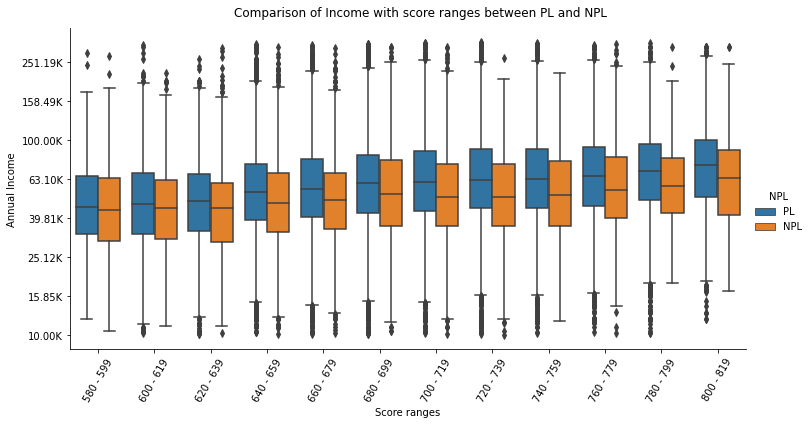

In [95]:
(sb.catplot(data=df_analysis, hue='NPL', y='log_AnnualIncome', x='CreditScoreRange', kind='box',
            sharey=True, height=5, aspect=2,
           )
 .set_axis_labels('Score ranges', 'Annual Income')
)
plt.suptitle('Comparison of Income with score ranges between PL and NPL', y=1.03)
plt.xticks(rotation=60)
ticks = plt.yticks()[0][1:-1]
plt.yticks(ticks=ticks, labels=[f'{(10**x)/1000:.2f}K' for x in ticks])
plt.show()

The chart above depicts the weak relation between Score ranges and annual income across the categories of PL and NPL (our variable of interest).  
<li>It shows how customers with higher income take higher scores.  
<li>Within each score range, the ones who are performing (PL) generally have more income than those who are NPL (as shown by the median of each box)

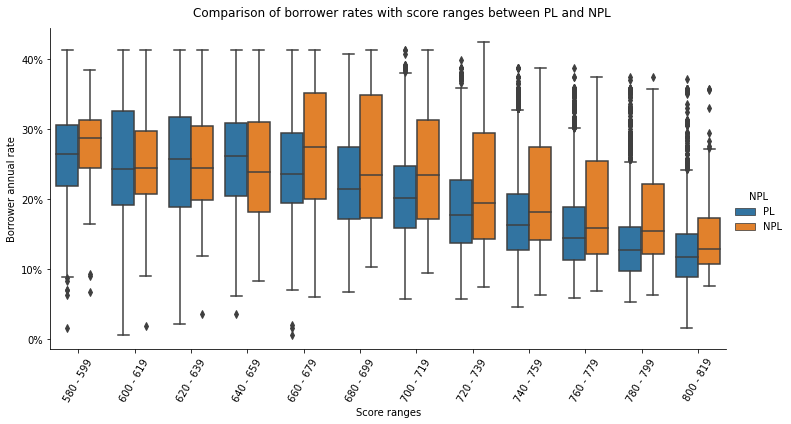

In [96]:
(sb.catplot(data=df_analysis, hue='NPL', y='BorrowerAPR', x='CreditScoreRange', kind='box',
            sharey=True, height=5, aspect=2,
           )
 .set_axis_labels('Score ranges','Borrower annual rate')
)
plt.suptitle('Comparison of borrower rates with score ranges between PL and NPL', y=1.03)
plt.xticks(rotation=60)
ticks = plt.yticks()[0][1:-1]
plt.yticks(ticks,labels=[f'{x*100:.0f}%' for x in ticks])
plt.show()

The previous chart depicts the relation between Score ranges and the charged annual rate across the categories of PL and NPL (our variable of interest).  
<li>It shows how customers with higher scores are generally charged lower annual rates.  
<li>Within each score range, the ones who are performing (PL) are charged rates lower than those who are NPL (as shown by the median of each box) especially in the higher score categories

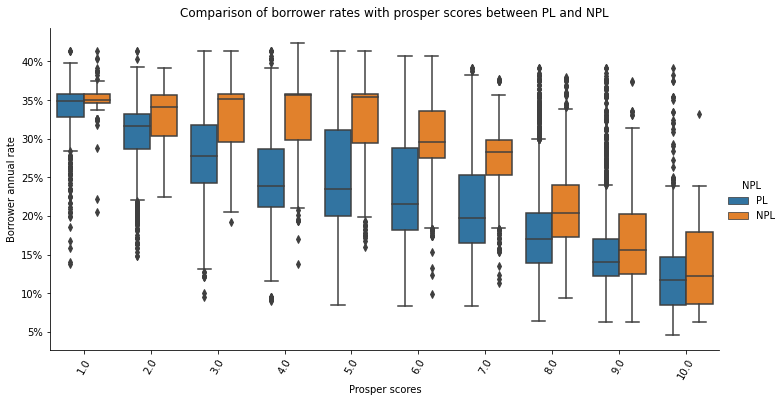

In [97]:
(sb.catplot(data=df_analysis, hue='NPL', y='BorrowerAPR', x='ProsperScore', kind='box',
            sharey=True, height=5, aspect=2,
           )
 .set_axis_labels('Prosper scores','Borrower annual rate')
)
plt.suptitle('Comparison of borrower rates with prosper scores between PL and NPL', y=1.03)
plt.xticks(rotation=60)
ticks = plt.yticks()[0][1:-1]
plt.yticks(ticks,labels=[f'{x*100:.0f}%' for x in ticks])
plt.show()

The chart above depicts the relation between Prosper scores and the charged annual rate across the categories of PL and NPL (our variable of interest).  
<li>It shows the same observations as the chart before it but with a much higher distinction between the PL and NPL.  
<li>The higher distinction between PL and NPL within the Scores is due to the interaction between the three variables as the Prosper score has higher correlation with the charged annual rates than the Score ranges>.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


**The weak relation between <u>Score ranges</u> and <u>annual income</u> across the categories of <u>PL and NPL</u> (our variable of interest).**  
<li>It shows how customers with higher income take higher scores.  
<li>Within each score range, the ones who are performing (PL) generally have more income than those who are NPL (as shown by the median of each box)

**The relation between <u>Score ranges</u> and the <u>charged annual rate</u> across the categories of <u>PL and NPL</u> (our variable of interest).**  
<li>It shows how customers with higher scores are generally charged lower annual rates.  
<li>Within each score range, the ones who are performing (PL) are charged rates lower than those who are NPL (as shown by the median of each box) especially in the higher score categories

### Were there any interesting or surprising interactions between features?

**The relation between <u>Prosper scores</u> and the <u>charged annual rate</u> across the categories of <u>PL and NPL</u> (our variable of interest).**  
<li>It shows how customers with higher scores are generally charged lower annual rates.  
<li>A much higher distinction between the PL and NPL than the one with score range.  
<li>The higher distinction between PL and NPL within the Scores is due to the interaction between the three variables as the Prosp`er score has higher correlation with the charged annual rates than the Score ranges although the Score ranges have better correlation with NPL than the Prosper score.